## PCA
* Based on [DataCamp tutorial](https://www.datacamp.com/tutorial/principal-component-analysis-in-python)


In [1]:
# load libaries
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
breast = load_breast_cancer()
# https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

In [3]:
breast.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
breast_data = breast.data
breast_data.shape  # it contain 569 data points with 30 features

(569, 30)

In [5]:
breast_labels = breast.target
breast_labels  # 0 and 1 are the labels, where 0 is malignant and 1 is benign

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [6]:
breast.target_names  # 0 and 1 are the labels, where 0 is malignant and 1 is benign

array(['malignant', 'benign'], dtype='<U9')

In [7]:
# reshape the breast_labels to concatenate it with the breast_data
# so that you can finally create a DataFrame which will have both the data and labels.
labels = np.reshape(breast_labels, (569, 1))

In [8]:
final_breast_data = np.concatenate([breast_data, labels], axis=1)

In [9]:
final_breast_data.shape

(569, 31)

In [10]:
breast_dataset = pd.DataFrame(final_breast_data)
breast_dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [11]:
features = breast.feature_names
features
# Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [12]:
features_labels = np.append(features, "label")

In [13]:
breast_dataset.columns = features_labels
breast_dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0


In [14]:
breast_dataset["label"].replace(0, "Malignant", inplace=True)
breast_dataset["label"].replace(1, "Benign", inplace=True)

In [15]:
breast_dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Malignant
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Benign


In [16]:
from sklearn.preprocessing import StandardScaler

x = breast_dataset[features].values
x = StandardScaler().fit_transform(x)  # normalizing the features

In [17]:
x.shape

(569, 30)

In [18]:
print("mean: ", np.mean(x), "\nstandard deviation: ", np.std(x))

mean:  -6.826538293184326e-17 
standard deviation:  1.0


In [19]:
feat_cols = [f"normalized feature {i}" for i in range(x.shape[1])]

normalised_breast = pd.DataFrame(x, columns=feat_cols)
normalised_breast.tail()

,normalized feature 0,normalized feature 1,normalized feature 2,normalized feature 3,normalized feature 4,normalized feature 5,normalized feature 6,normalized feature 7,normalized feature 8,normalized feature 9,...,normalized feature 20,normalized feature 21,normalized feature 22,normalized feature 23,normalized feature 24,normalized feature 25,normalized feature 26,normalized feature 27,normalized feature 28,normalized feature 29
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


In [20]:
pca_breast = PCA(n_components=30)
PC_breast = pca_breast.fit_transform(x)

In [21]:
pc_columns = [f"PC {i}" for i in range(x.shape[1])]
principal_breast_Df = pd.DataFrame(data=PC_breast, columns=pc_columns)
principal_breast_Df.tail()

,PC 0,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,...,PC 20,PC 21,PC 22,PC 23,PC 24,PC 25,PC 26,PC 27,PC 28,PC 29
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596130,-0.035471,0.987929,0.256989,...,0.006888,-0.067000,0.088590,0.107898,0.219520,-0.122900,0.159198,0.009853,0.007119,-0.001415
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716326,-1.113360,-0.105207,-0.108632,...,-0.009802,0.019563,-0.055405,0.086135,0.001197,0.065889,-0.068512,-0.023575,-0.027486,-0.010419
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758,0.341887,0.393917,0.520877,...,-0.036592,0.063352,-0.200312,-0.044819,0.002429,0.007095,-0.023691,-0.002578,0.006706,0.003770
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223082,-0.280239,-0.542035,-0.089296,...,0.140648,-0.042478,0.168820,-0.195969,0.377830,-0.198192,-0.027409,-0.068086,-0.084163,-0.023783
568,-5.475243,-0.670637,1.490443,-2.299157,-0.184703,1.617837,1.698952,1.046354,0.374101,-0.047726,...,0.274680,-0.243238,0.037915,-0.075111,-0.017508,0.347115,0.127381,-0.009516,-0.060913,-0.019476


(0.0, 1.1)

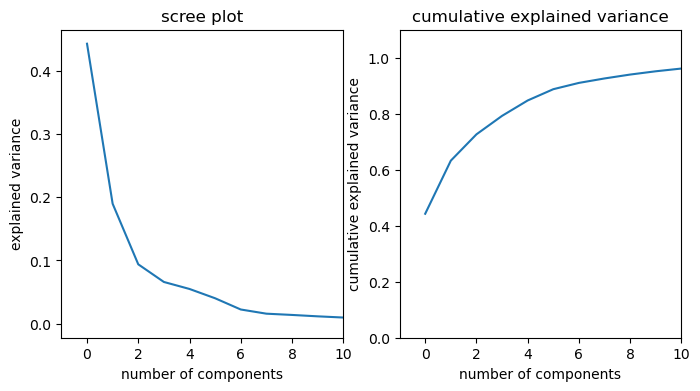

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].plot(pca_breast.explained_variance_ratio_)
axs[0].set_xlabel("number of components")
axs[0].set_ylabel("explained variance")
axs[0].set_title("scree plot")
axs[0].set_xlim(-1, 10)
axs[1].plot(np.cumsum(pca_breast.explained_variance_ratio_))
axs[1].set_xlabel("number of components")
axs[1].set_ylabel("cumulative explained variance")
axs[1].set_title("cumulative explained variance")
axs[1].set_xlim(-1, 10)
axs[1].set_ylim(0, 1.1)

In [23]:
Benign_pc = principal_breast_Df[breast_dataset["label"] == "Benign"]
Malignant_pc = principal_breast_Df[breast_dataset["label"] == "Malignant"]

Text(0.5, 1.0, 'PCA of Breast Cancer Dataset')

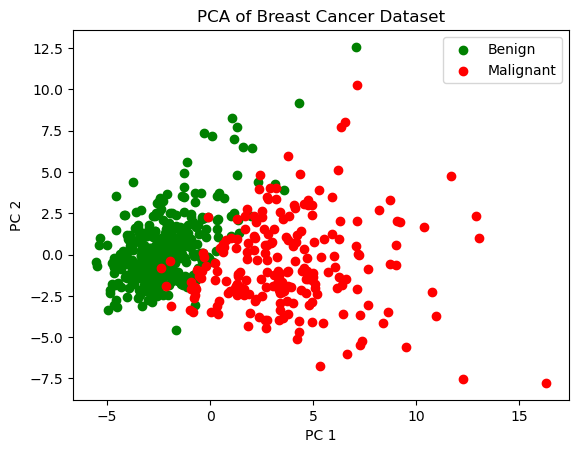

In [24]:
plt.scatter(Benign_pc["PC 0"], Benign_pc["PC 1"], color="green", label="Benign")
plt.scatter(Malignant_pc["PC 0"], Malignant_pc["PC 1"], color="red", label="Malignant")
plt.legend()
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("PCA of Breast Cancer Dataset")